Importar librerias

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [148]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

Primera vista al dataset

In [209]:
df_test = pd.read_excel("./bike_test.xlsx")
df_train = pd.read_excel("./bike_train.xlsx")

In [150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [151]:
df_train.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


In [153]:
df_test.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

Normalizar la columna "dteday"

In [210]:
df_train['dteday']=df_train['dteday'].map(dt.datetime.toordinal)

In [211]:
df_test['dteday']=df_test['dteday'].map(dt.datetime.toordinal)

Crear dataframe concatenando los dos datasets para luego hacer el modelo

In [212]:
all_data = pd.concat([df_train, df_test], ignore_index=True)

In [157]:
all_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [213]:
# borrar las columnas que tienen valores nulos
all_data.drop(columns=["casual", "registered"], inplace=True)

In [214]:
# correlacionar las columnas y graficar
corrmat = all_data.corr()

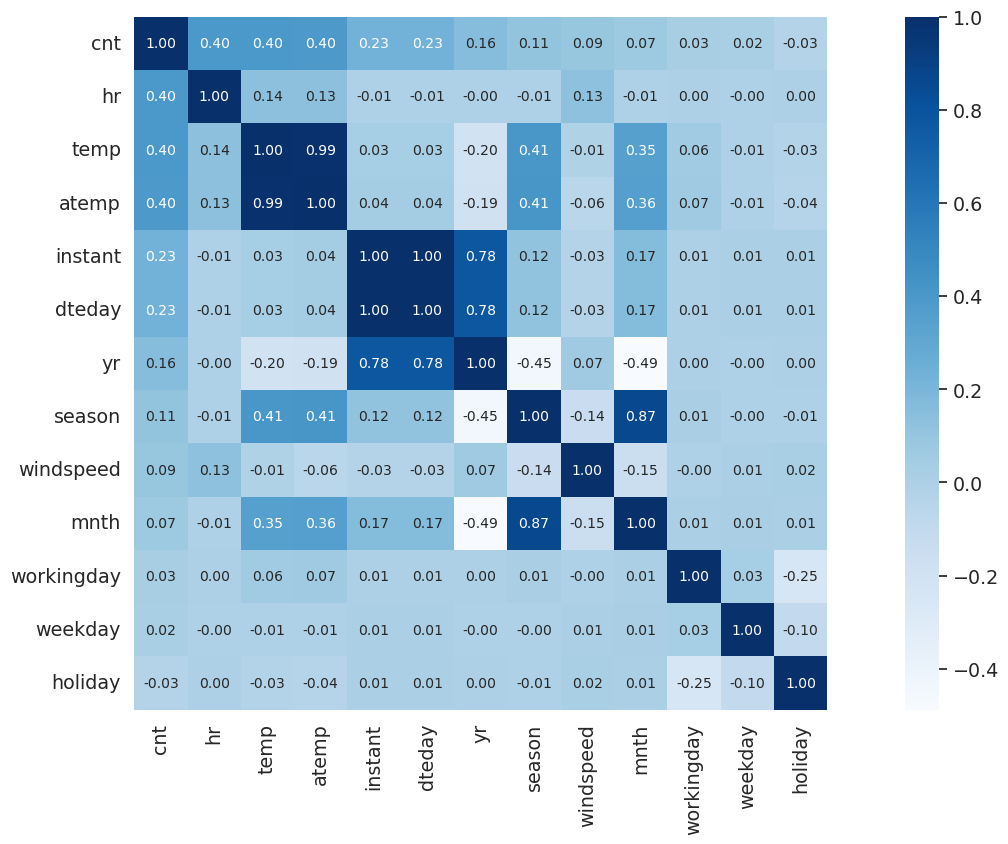

In [215]:
plt.figure(figsize=(20, 9))
k=13
cols = corrmat.nlargest(k, 'cnt')['cnt'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

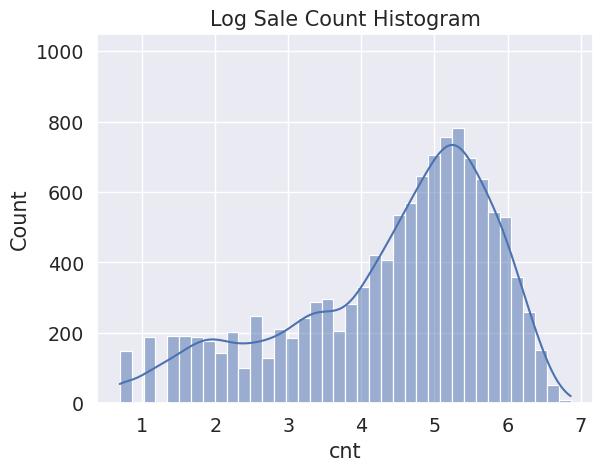

In [216]:
plt.title('Log Sale Count Histogram')
train_target_log = np.log1p(df_train["cnt"])
plt.ylim(0,1050)
sns.histplot(train_target_log, kde=True)
plt.show()

In [217]:
all_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [218]:
# lista con las columnas que se utiliza para la varible y
caracteristicas = ["instant",'dteday', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

In [219]:
# completar valores nulos de la columna "cnt"
all_data["cnt"] = all_data["cnt"].interpolate().bfill()

In [220]:
# se crean las variables para el modelo 
X = all_data[caracteristicas]
y = np.log1p(all_data["cnt"])

In [221]:
# calcular la cantidad de filas para el test
len(df_test) / len(df_train)

0.44837069755812986

In [222]:
# se crean las variables de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.44837069755812986, random_state=42)

In [229]:
# se crea el modelo
model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(random_state=42)

In [230]:
# se entrena al modelo y se predice  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# y_pred = np.expm1(y_pred)
y_pred

array([4.20469262, 4.64076406, 2.24536393, ..., 2.80946563, 4.20469262,
       5.54492651])

In [231]:
# se calcula RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.07892573516435333


In [232]:
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.9416857790669466


In [234]:
# se calcula RSME
mean_absolute_error(y_test, y_pred)

0.15762860506226492

In [235]:
# se utiliza exponencial
y_pred = np.expm1(y_pred)

In [237]:
y_pred[0:6]

array([ 66.        , 102.62349241,   8.44385181,  66.        ,
        11.65764308,  22.74341825])

/tmp/ipykernel_54933/2128890990.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')


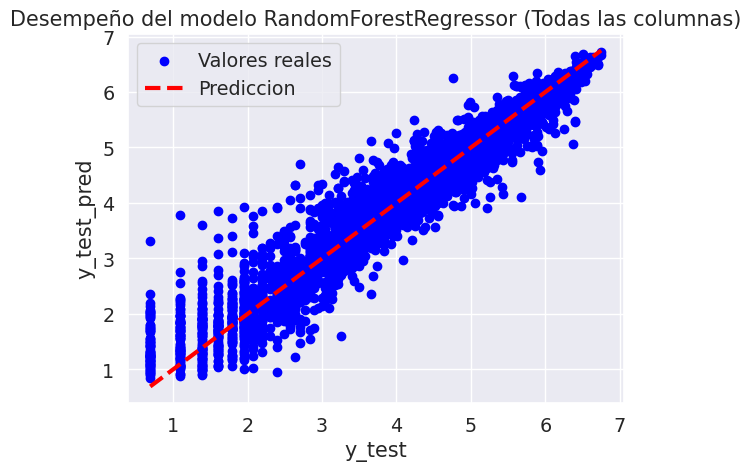

In [189]:
# Grafica de los resultados
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo RandomForestRegressor (Todas las columnas)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

Otra forma con mejores resultados

In [292]:
# se crean dos listas que se utilizan para las variables x e y
caracteristicas = list(df_test.columns[2:])
cnt = df_train.columns[-1]

In [301]:
# se crean las variables. En la variable "y" se utiliza logaritmo para que la prediccion sea mas exacta
x = df_train[caracteristicas]
y = np.log(df_train[cnt])


In [303]:
# se crean las variables de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.44837069755812986, random_state=42)

In [304]:
# se crea el modelo RandomForest
model = RandomForestRegressor(random_state=42, n_estimators=140)
model

RandomForestRegressor(n_estimators=140, random_state=42)

In [305]:
# se entrena el modelo
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=140, random_state=42)

In [306]:
# se predice los valores con el dataset test
prediction = model.predict(df_test[caracteristicas])
prediction

array([2.48749903, 2.55477619, 2.88752457, ..., 4.51251623, 4.36671862,
       3.89197629])

In [307]:
# se calcula RMSLE
RMSLE = mean_squared_log_error(y_test, prediction,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 


Error cuadratico medio logaritmico:  0.4965868958393108


In [308]:
# se verifica el rendimiento del modelo
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.9333005889077344


In [309]:
# se calcula RMSE
mean_absolute_error(y_test, prediction)

1.6436757802988236

/tmp/ipykernel_54933/3243585669.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')


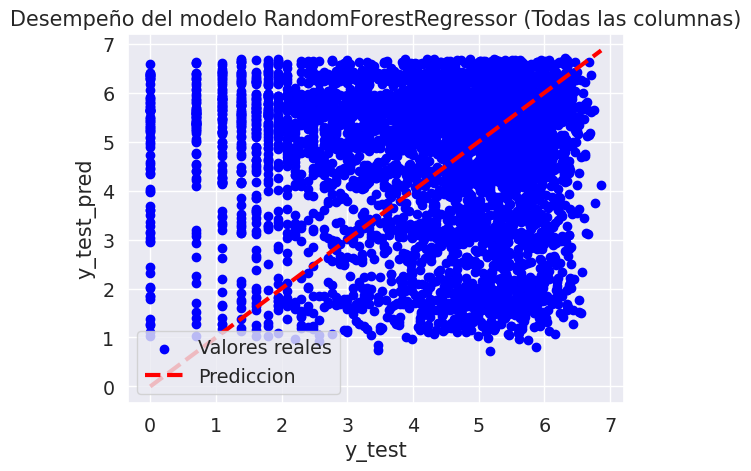

In [310]:
# grafico del resultado
plt.scatter(y_test, prediction, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo RandomForestRegressor (Todas las columnas)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

In [311]:
# se calcula el exponente ya que se hizo el logaritmo para predecir
prediction = np.exp(prediction)
prediction

array([12.03114891, 12.86841922, 17.94882357, ..., 91.15088665,
       78.78468485, 49.00764431])

In [314]:
df = pd.DataFrame(prediction)

In [316]:
df["pred"] = prediction

In [319]:
df = df[["pred"]]

In [320]:
df

,pred
0,12.031149
1,12.868419
2,17.948824
3,81.692251
4,164.701339
...,...
5375,213.671018
5376,171.101984
5377,91.150887
5378,78.784685


In [321]:
df.to_csv("./ErosLibidus.csv")